In [9]:
nc_path = "/Users/siwu/Documents/CS7980/tornado_project/comparative_analysis/torn_pred_updated/Archive/data/torn/"
from netCDF4 import Dataset
import numpy as np
nc=Dataset( nc_path + "1.nc" )
print(nc.variables.keys())

dict_keys(['longitude', 'latitude', 'time', 'SHSR'])


In [6]:
for var in nc.variables.keys():
    data=nc.variables[var][:].data
    print(var,data.shape)

longitude (41,)
latitude (41,)
time (20,)
SHSR (20, 41, 41)


#### Try Some Simple Visualization

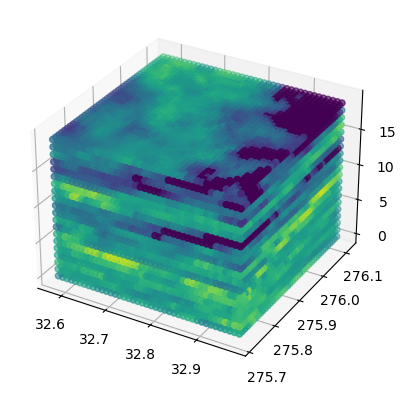

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming nc is your NetCDF dataset already loaded:
data = nc.variables["SHSR"][:].data

# Prepare figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Prepare data - ensure X, Y, and Z are correctly broadcasted to match the dimensions of 'value'
X = np.repeat(nc.variables["latitude"][:].data[:, np.newaxis], nc.variables["longitude"][:].size, axis=1)
Y = np.repeat(nc.variables["longitude"][:].data[np.newaxis, :], nc.variables["latitude"][:].size, axis=0)
Z = np.arange(data.shape[0])[:, np.newaxis, np.newaxis]
X, Y, Z = np.broadcast_arrays(X, Y, Z)

# Assuming 'value' needs to match the dimensions, let's flatten them for scatter plot
value = data.flatten()  # Make sure this is the correct operation for your data
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=value)  # Color by value

plt.show()
